In [4]:
import numpy as np
import pandas as pd
from numpy import loadtxt
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import csv
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Serif"]})
font_size = 24
marker_size = 6

args = {'opt': "Prox", #"Avg" "Prox"
        'iid': "niid", #"dirichlet" "niid"
        'dataset': 'mnist', #cifar, mnist, synthetic
        'method': "BL", #"BL" "UR", "opti", "WR", "Sal_WR"
        'ep':20,
        'seed_ind': 0,
        'K':10
        }

In [5]:
def give_filename(args):
    saveFileName = f"csv_res/M_effect_{args['dataset']}_{args['iid']}.csv"
    return saveFileName

def give_data(args):
    file_name = give_filename(args)
    iid_flag = 'd' if args['iid']=="diri" else 'n'
    lala = pd.read_csv(file_name)
    print(lala.columns)
    case_names = [-1000, -10, 0, 10, 1000]
    # key_names = [f"{iid_flag}Op_M_{lala}_v_1 - accuracy" for lala in case_names]
    key_names = [f"{iid_flag}Op_M_{lala}_v_1_thrU - accuracy" for lala in case_names]
    key_names.append(f"{args['iid']}_WR_UE_500_Mnist_oldMLP - accuracy")
    # key_names.append(f"{iid_flag}WR_lUE_10_cellR_1000 - accuracy")
    print(key_names)
    return lala[key_names]

lala =give_data(args)
lala

Index(['Step', 'nOp_M_1000_v_1_thrU - accuracy',
       'nOp_M_1000_v_1_thrU - accuracy__MIN',
       'nOp_M_1000_v_1_thrU - accuracy__MAX', 'nOp_M_10_v_1_thrU - accuracy',
       'nOp_M_10_v_1_thrU - accuracy__MIN',
       'nOp_M_10_v_1_thrU - accuracy__MAX', 'nOp_M_0_v_1_thrU - accuracy',
       'nOp_M_0_v_1_thrU - accuracy__MIN', 'nOp_M_0_v_1_thrU - accuracy__MAX',
       'nOp_M_-10_v_1_thrU - accuracy', 'nOp_M_-10_v_1_thrU - accuracy__MIN',
       'nOp_M_-10_v_1_thrU - accuracy__MAX', 'nOp_M_-1000_v_1_thrU - accuracy',
       'nOp_M_-1000_v_1_thrU - accuracy__MIN',
       'nOp_M_-1000_v_1_thrU - accuracy__MAX',
       'niid_WR_UE_500_Mnist_oldMLP - accuracy',
       'niid_WR_UE_500_Mnist_oldMLP - accuracy__MIN',
       'niid_WR_UE_500_Mnist_oldMLP - accuracy__MAX'],
      dtype='object')
['nOp_M_-1000_v_1_thrU - accuracy', 'nOp_M_-10_v_1_thrU - accuracy', 'nOp_M_0_v_1_thrU - accuracy', 'nOp_M_10_v_1_thrU - accuracy', 'nOp_M_1000_v_1_thrU - accuracy', 'niid_WR_UE_500_Mnist_oldMLP - 

,nOp_M_-1000_v_1_thrU - accuracy,nOp_M_-10_v_1_thrU - accuracy,nOp_M_0_v_1_thrU - accuracy,nOp_M_10_v_1_thrU - accuracy,nOp_M_1000_v_1_thrU - accuracy,niid_WR_UE_500_Mnist_oldMLP - accuracy
0,16.840000,10.010000,15.060000,13.270000,10.990000,10.050000
1,11.760000,30.650000,25.389999,23.629999,32.840000,10.330000
2,29.520000,22.660000,30.719999,26.990000,28.020000,18.930000
3,18.389999,28.290001,40.400002,29.900000,24.490000,18.350000
4,26.190001,36.720001,28.230000,31.230000,40.320000,19.170000
...,...,...,...,...,...,...
595,89.860001,89.650002,89.610001,90.099998,90.620003,91.779999
596,89.459999,87.709999,91.209999,89.889999,89.639999,91.870003
597,91.239998,90.089996,92.070000,91.870003,91.529999,92.110001
598,90.110001,89.070000,91.029999,91.169998,90.309998,92.169998


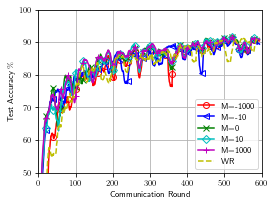

In [9]:
colors = ['r', 'b', 'g', 'c','m','y']
markers = ['o', '<','x','2','+','D']
markers = ['o', '<','x','D','+', 'None']
line_style = ['-', '-', '-', '-','-', '--']
fig = plt.figure(figsize=[4,3])
ax = fig.add_subplot(111)
font_size = 8
marker_size = 6
window_size = 11
len_data = len(lala[lala.columns[0]].dropna())
case_names = [-1000, -10, 0, 10, 1000]
for nb_line, yoyo in enumerate(lala.columns):
    vec = lala[yoyo]
    vec = vec[:len_data]
    acc_smooth = vec.rolling(window_size, center = True).mean()#.dropna()
    acc_std = vec.rolling(window_size, center = True).std()#.dropna()
    plt.plot(acc_smooth, linestyle=line_style[nb_line],  marker= markers[nb_line],markevery = 20, markeredgewidth = 1, fillstyle='none', color = colors[nb_line])
    # plt.plot(acc_std, linestyle=line_style[nb_line],  marker= markers[nb_line],markevery = 20, markeredgewidth = 1, fillstyle='none', color = colors[nb_line])
    indvec = np.linspace(0, len_data, int(len_data/50)+1)
    indvec = indvec[:-1]
    # ax.errorbar(indvec,acc_smooth[indvec], yerr = acc_std[indvec],
    #             fmt='o', capsize=1,linewidth = 2, color = colors[nb_line])
# marker= markers[nb_line],markevery = 15, markeredgewidth = 1, fillstyle='none'
legend_names = [f"M={M_val}" for M_val in case_names]
legend_names.append('WR')
plt.legend(legend_names,loc=0,prop={'size': font_size})
plt.grid()
plt.xlabel("Communication Round",fontsize=font_size)
plt.ylabel("Test Accuracy $\%$",fontsize=font_size)
plt.xticks(fontsize= font_size)
plt.yticks(fontsize= font_size)
plt.xlim([0,len_data])
# plt.ylim([5,60])
plt.ylim([50,100])

# figure_folder = "D:/Documents/Sciebo_groupfiles/PhD_Paul/figures/"
# figure_folder = "D:/sciebo/files/PhD_Paul/figures/"
figure_folder = "./figures2/"
# plt.savefig(figure_folder+"Meffect_"+args['dataset']+"_"+args['iid']+".pdf")
plt.savefig(figure_folder+"Meffect_"+args['dataset']+"_"+args['iid']+".pdf")


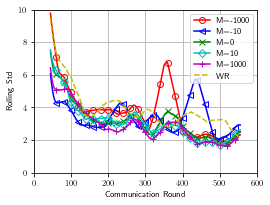

In [8]:
colors = ['r', 'b', 'g', 'c','m','y']
markers = ['o', '<','x','2','+','D']
markers = ['o', '<','x','D','+', 'None']
line_style = ['-', '-', '-', '-','-', '--']
fig = plt.figure(figsize=[4,3])
ax = fig.add_subplot(111)
font_size = 8
marker_size = 6
window_size = 41
window_size2 = 50
len_data = len(lala[lala.columns[0]].dropna())
case_names = [-1000, -10, 0, 10, 1000]
for nb_line, yoyo in enumerate(lala.columns):
    vec = lala[yoyo]
    vec = vec[:len_data]
    acc_smooth = vec.rolling(window_size, center = True).mean()#.dropna()
    acc_std = vec.rolling(window_size, center = True).std()#.dropna()
    acc_std_smooth = acc_std.rolling(window_size2, center = True).mean()
    plt.plot(acc_std_smooth , linestyle=line_style[nb_line],  marker= markers[nb_line],markevery = 20, markeredgewidth = 1, fillstyle='none', color = colors[nb_line])
    indvec = np.linspace(0, len_data, int(len_data/50)+1)
    indvec = indvec[:-1]
    # ax.errorbar(indvec,acc_smooth[indvec], yerr = acc_std[indvec],
    #             fmt='o', capsize=1,linewidth = 2, color = colors[nb_line])
# marker= markers[nb_line],markevery = 15, markeredgewidth = 1, fillstyle='none'
legend_names = [f"M={M_val}" for M_val in case_names]
legend_names.append('WR')
plt.legend(legend_names,loc=0,prop={'size': font_size})
plt.grid()
plt.xlabel("Communication Round",fontsize=font_size)
plt.ylabel("Rolling Std",fontsize=font_size)
plt.xticks(fontsize= font_size)
plt.yticks(fontsize= font_size)
plt.xlim([0,len_data])
# plt.ylim([0,30])
plt.ylim([0,10])

# figure_folder = "D:/Documents/Sciebo_groupfiles/PhD_Paul/figures/"
# figure_folder = "D:/sciebo/files/PhD_Paul/figures/"
figure_folder = "./figures2/"
# plt.savefig(figure_folder+"Meffect_"+args['dataset']+"_"+args['iid']+".pdf")
plt.savefig(figure_folder+"Meffect_std_"+args['dataset']+"_"+args['iid']+".pdf")
